In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor


from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
contaminacion = pd.read_csv("contaminacion_201710-201712.csv")
contaminacion['missing'] = contaminacion.NO2.isna()

contaminacion.sample(10)

,estacion,zona,timestamp,NO2,O3,PM10,PM25,missing
18771,Juan Carlos I,3,2017-11-16 03:00:00,18.0,22.0,NaN,NaN,False
2883,Barajas Pueblo,3,2017-10-29 03:00:00,24.0,39.0,NaN,NaN,False
9747,El Pardo,4,2017-11-08 03:00:00,30.0,2.0,NaN,NaN,False
24221,Pza. Fernández Ladreda,5,2017-12-29 05:00:00,16.0,55.0,NaN,NaN,False
12166,Ensanche de Vallecas,2,2017-11-16 22:00:00,235.0,3.0,NaN,NaN,False
3738,Barajas Pueblo,3,2017-12-03 18:00:00,60.0,22.0,NaN,NaN,False
23460,Pza. Fernández Ladreda,5,2017-11-27 12:00:00,101.0,5.0,NaN,NaN,False
17306,Farolillo,5,2017-12-17 02:00:00,22.0,51.0,3.0,NaN,False
12293,Ensanche de Vallecas,2,2017-11-22 05:00:00,60.0,2.0,NaN,NaN,False
25692,Pza. del Carmen,1,2017-11-28 12:00:00,93.0,1.0,NaN,NaN,False


### Ejemplo 1: media

In [3]:
contaminacion['NO2_fill1'] = contaminacion.NO2.where(pd.notna(contaminacion.NO2), contaminacion.NO2.mean())

contaminacion[contaminacion.missing].sample(5)

,estacion,zona,timestamp,NO2,O3,PM10,PM25,missing,NO2_fill1
4437,Barrio del Pilar,1,2017-10-01 20:00:00,NaN,23.0,NaN,NaN,True,55.007985
5625,Barrio del Pilar,1,2017-11-20 09:00:00,NaN,NaN,NaN,NaN,True,55.007985
24828,Pza. del Carmen,1,2017-10-23 11:00:00,NaN,NaN,NaN,NaN,True,55.007985
27190,Tres Olivos,3,2017-10-29 22:00:00,NaN,NaN,NaN,NaN,True,55.007985
16900,Farolillo,5,2017-11-30 04:00:00,NaN,NaN,NaN,NaN,True,55.007985


Text(0.5,1,'Promedio NO2 por zona')

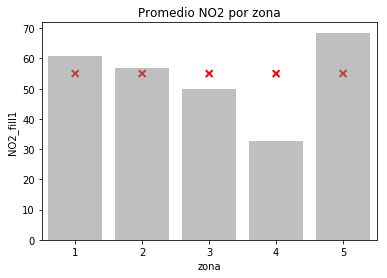

In [4]:
sns.barplot('zona', 'NO2', 
            data=contaminacion.groupby('zona')[['NO2']].mean().reset_index(),
            color='gray', alpha=0.5)

sns.pointplot('zona', 'NO2_fill1', 
              data=contaminacion[contaminacion.missing].groupby('zona')[['NO2_fill1']].min().reset_index(),
              color='red', linestyles="", markers="x")

plt.title("Promedio NO2 por zona")

### Ejemplo 2: media/mediana por estación

In [5]:
contaminacion['NO2_fill2'] = contaminacion.NO2.where(pd.notna(contaminacion.NO2), 
                                                     contaminacion.groupby('estacion').NO2.transform('mean'))
contaminacion[contaminacion.missing].sample(5)

,estacion,zona,timestamp,NO2,O3,PM10,PM25,missing,NO2_fill1,NO2_fill2
7793,Casa de Campo,4,2017-11-18 17:00:00,NaN,NaN,NaN,NaN,True,55.007985,39.528044
4437,Barrio del Pilar,1,2017-10-01 20:00:00,NaN,23.0,NaN,NaN,True,55.007985,62.602564
7794,Casa de Campo,4,2017-11-18 18:00:00,NaN,NaN,NaN,NaN,True,55.007985,39.528044
5625,Barrio del Pilar,1,2017-11-20 09:00:00,NaN,NaN,NaN,NaN,True,55.007985,62.602564
4427,Barrio del Pilar,1,2017-10-01 10:00:00,NaN,52.0,NaN,NaN,True,55.007985,62.602564


Text(0.5,1,'Distribución NO2 por zona')

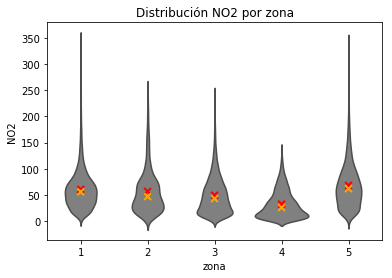

In [6]:
sns.violinplot('zona', 'NO2', data=contaminacion,
               inner=None, color='gray', alpha=0.5)

sns.pointplot('zona', 'NO2', 
              data=contaminacion.groupby('zona')[['NO2']].mean().reset_index(),
              color='red', linestyles="", markers="x")

sns.pointplot('zona', 'NO2', 
              data=contaminacion.groupby('zona')[['NO2']].median().reset_index(),
              color='orange', linestyles="", markers="x")

plt.title("Distribución NO2 por zona")

Text(0.5,1,'Distribución NO2 por estación (zona 4)')

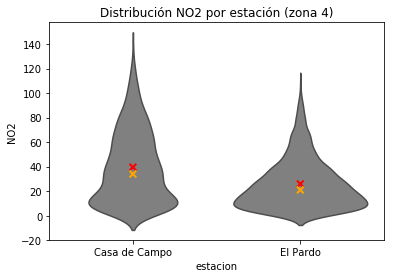

In [7]:
sns.violinplot('estacion', 'NO2', data=contaminacion[contaminacion.zona == 4],
               inner=None, color='gray', alpha=0.5)

sns.pointplot('estacion', 'NO2', 
              data=contaminacion[contaminacion.zona == 4].groupby('estacion')[['NO2']].mean().reset_index(),
              color='red', linestyles="", markers="x")

sns.pointplot('estacion', 'NO2', 
              data=contaminacion[contaminacion.zona == 4].groupby('estacion')[['NO2']].median().reset_index(),
              color='orange', linestyles="", markers="x")

plt.title("Distribución NO2 por estación (zona 4)")

### Ejemplo 3: imputación aleatoria por estación

In [8]:
def make_bins(values, binwidth):
    return np.floor(values / binwidth) * binwidth + (binwidth / 2)
    
contaminacion['NO2_bins'] = make_bins(contaminacion.NO2, 5)

contaminacion[~contaminacion.missing].sample(5)

,estacion,zona,timestamp,NO2,O3,PM10,PM25,missing,NO2_fill1,NO2_fill2,NO2_bins
17945,Juan Carlos I,3,2017-10-12 16:00:00,9.0,119.0,NaN,NaN,False,9.0,9.0,7.5
24793,Pza. del Carmen,1,2017-10-22 00:00:00,40.0,35.0,NaN,NaN,False,40.0,40.0,42.5
3400,Barajas Pueblo,3,2017-11-19 16:00:00,58.0,34.0,NaN,NaN,False,58.0,58.0,57.5
6362,Barrio del Pilar,1,2017-12-21 02:00:00,34.0,28.0,NaN,NaN,False,34.0,34.0,32.5
16997,Farolillo,5,2017-12-04 05:00:00,47.0,1.0,5.0,NaN,False,47.0,47.0,47.5


In [9]:
NO2_sample = contaminacion.groupby('estacion').apply(
    lambda x: x[~x.missing].NO2_bins.sample(len(x), replace=True)
).reset_index().NO2_bins

contaminacion['NO2_fill3'] = contaminacion.NO2.where(pd.notna(contaminacion.NO2), NO2_sample)

contaminacion[contaminacion.missing].sample(5)

,estacion,zona,timestamp,NO2,O3,PM10,PM25,missing,NO2_fill1,NO2_fill2,NO2_bins,NO2_fill3
4145,Barajas Pueblo,3,2017-12-20 17:00:00,NaN,NaN,NaN,NaN,True,55.007985,54.568120,NaN,22.5
7791,Casa de Campo,4,2017-11-18 15:00:00,NaN,NaN,NaN,NaN,True,55.007985,39.528044,NaN,7.5
4958,Barrio del Pilar,1,2017-10-23 13:00:00,NaN,58.0,NaN,NaN,True,55.007985,62.602564,NaN,47.5
23316,Pza. Fernández Ladreda,5,2017-11-21 12:00:00,NaN,NaN,NaN,NaN,True,55.007985,80.410431,NaN,77.5
4431,Barrio del Pilar,1,2017-10-01 14:00:00,NaN,74.0,NaN,NaN,True,55.007985,62.602564,NaN,32.5


Text(0.5,1,'Distribución NO2 por estación (zona 4)')

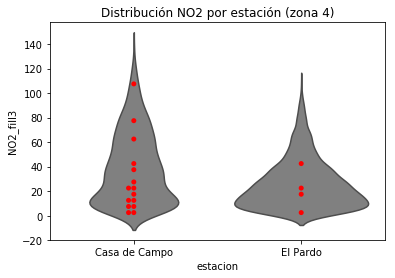

In [10]:
sns.violinplot('estacion', 'NO2', data=contaminacion[contaminacion.zona == 4],
               inner=None, color='gray', alpha=0.5)

sns.swarmplot('estacion', 'NO2_fill3', 
              data=contaminacion[(contaminacion.zona == 4) & (contaminacion.missing)],
              color='red')

plt.title("Distribución NO2 por estación (zona 4)")

### Ejemplo 4: imputación por regresión

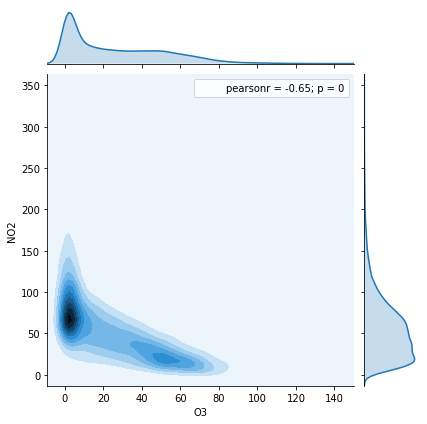

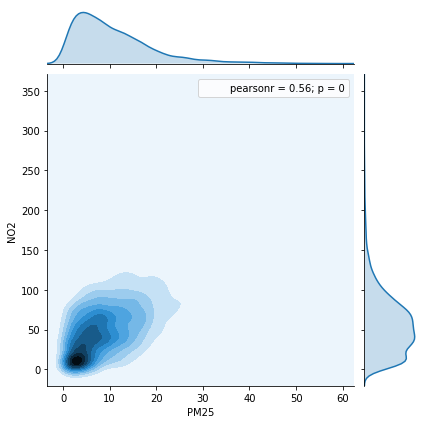

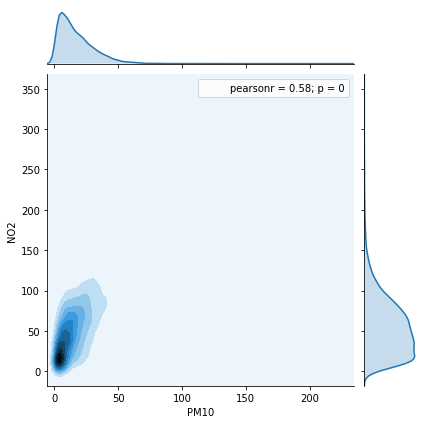

In [11]:
sns.jointplot('O3', 'NO2', data=contaminacion, kind='kde')
sns.jointplot('PM25', 'NO2', data=contaminacion, kind='kde')
sns.jointplot('PM10', 'NO2', data=contaminacion, kind='kde')

#### Regresión lineal

In [12]:
variables = contaminacion.dropna()

In [13]:
contaminacion['NO2_fill4a'] = contaminacion.NO2

est_lineal = LinearRegression()

In [14]:
for est in contaminacion.estacion.unique():
        
    variables_est = variables[variables.estacion == est]
    
    if len(variables_est) == 0:
        continue

    est_lineal.fit(variables_est[['O3', 'PM25', 'PM10']], variables_est.NO2)

    ind_pred = (contaminacion.estacion == est) & contaminacion.missing &\
               contaminacion.O3.notna() & contaminacion.PM25.notna() & contaminacion.PM10.notna()
    
    if sum(ind_pred) == 0:
        continue

    contaminacion.loc[ind_pred, 'NO2_fill4a'] = est_lineal.predict(contaminacion.loc[ind_pred, ['O3', 'PM25', 'PM10']])

In [15]:
contaminacion[contaminacion.missing & contaminacion.NO2_fill4a.notna()]

,estacion,zona,timestamp,NO2,O3,PM10,PM25,missing,NO2_fill1,NO2_fill2,NO2_bins,NO2_fill3,NO2_fill4a
6682,Casa de Campo,4,2017-10-03 09:00:00,NaN,1.0,19.0,8.0,True,55.007985,39.528044,NaN,62.5,61.096838
7858,Casa de Campo,4,2017-11-21 10:00:00,NaN,7.0,33.0,20.0,True,55.007985,39.528044,NaN,17.5,68.148112
8196,Casa de Campo,4,2017-12-05 12:00:00,NaN,16.0,29.0,18.0,True,55.007985,39.528044,NaN,12.5,58.674243


Text(0.5,1,'Niveles de NO2 en Casa de Campo')

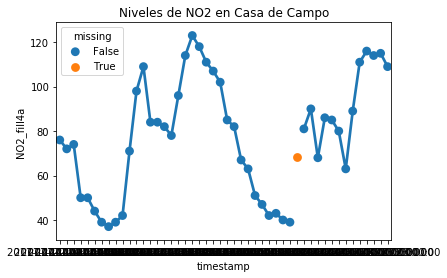

In [16]:
sns.pointplot('timestamp', 'NO2_fill4a', hue='missing', 
              data=contaminacion[(contaminacion.estacion == "Casa de Campo") &\
                                 (contaminacion.timestamp >= "2017-11-20") &\
                                 (contaminacion.timestamp < "2017-11-22")])

plt.title("Niveles de NO2 en Casa de Campo")

Text(0.5,1,'Niveles de NO2 en Casa de Campo')

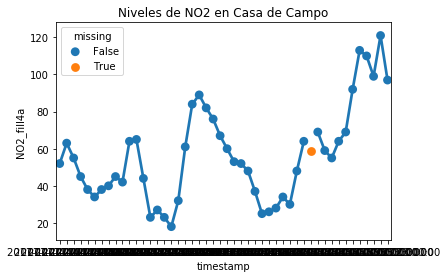

In [17]:
sns.pointplot('timestamp', 'NO2_fill4a', hue='missing', 
              data=contaminacion[(contaminacion.estacion == "Casa de Campo") &\
                                 (contaminacion.timestamp >= "2017-12-04") &\
                                 (contaminacion.timestamp < "2017-12-06")])

plt.title("Niveles de NO2 en Casa de Campo")

#### Árbol de decisión

In [18]:
variables = contaminacion[['estacion', 'NO2', 'PM25', 'PM10']].dropna()

In [19]:
contaminacion['NO2_fill4b'] = contaminacion.NO2

est_arbol = DecisionTreeRegressor()

In [20]:
for est in contaminacion.estacion.unique():
        
    variables_est = variables[variables.estacion == est]
    
    if len(variables_est) == 0:
        continue

    est_arbol.fit(variables_est[['PM25', 'PM10']], variables_est.NO2)

    ind_pred = (contaminacion.estacion == est) & contaminacion.missing &\
               contaminacion.PM25.notna() & contaminacion.PM10.notna()
    
    if sum(ind_pred) == 0:
        continue

    contaminacion.loc[ind_pred, 'NO2_fill4b'] = est_arbol.predict(contaminacion.loc[ind_pred, ['PM25', 'PM10']])

In [21]:
contaminacion[contaminacion.missing & contaminacion.NO2_fill4b.notna()]

,estacion,zona,timestamp,NO2,O3,PM10,PM25,missing,NO2_fill1,NO2_fill2,NO2_bins,NO2_fill3,NO2_fill4a,NO2_fill4b
6682,Casa de Campo,4,2017-10-03 09:00:00,NaN,1.0,19.0,8.0,True,55.007985,39.528044,NaN,62.5,61.096838,48.500000
6683,Casa de Campo,4,2017-10-03 10:00:00,NaN,NaN,29.0,12.0,True,55.007985,39.528044,NaN,27.5,NaN,36.000000
6826,Casa de Campo,4,2017-10-09 09:00:00,NaN,NaN,24.0,6.0,True,55.007985,39.528044,NaN,7.5,NaN,46.000000
7522,Casa de Campo,4,2017-11-07 10:00:00,NaN,NaN,27.0,16.0,True,55.007985,39.528044,NaN,37.5,NaN,74.000000
7523,Casa de Campo,4,2017-11-07 11:00:00,NaN,NaN,31.0,17.0,True,55.007985,39.528044,NaN,22.5,NaN,67.857143
7858,Casa de Campo,4,2017-11-21 10:00:00,NaN,7.0,33.0,20.0,True,55.007985,39.528044,NaN,17.5,68.148112,72.000000
8196,Casa de Campo,4,2017-12-05 12:00:00,NaN,16.0,29.0,18.0,True,55.007985,39.528044,NaN,12.5,58.674243,83.000000
13453,Escuelas Aguirre,1,2017-10-09 12:00:00,NaN,NaN,5.0,2.0,True,55.007985,74.404178,NaN,102.5,NaN,57.736842
13789,Escuelas Aguirre,1,2017-10-23 12:00:00,NaN,NaN,18.0,12.0,True,55.007985,74.404178,NaN,67.5,NaN,85.600000
14461,Escuelas Aguirre,1,2017-11-20 13:00:00,NaN,NaN,31.0,22.0,True,55.007985,74.404178,NaN,92.5,NaN,95.750000


Text(0.5,1,'Niveles de NO2 en Escuelas Aguirre')

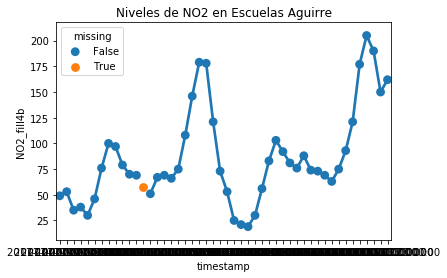

In [22]:
sns.pointplot('timestamp', 'NO2_fill4b', hue='missing', 
              data=contaminacion[(contaminacion.estacion == "Escuelas Aguirre") &\
                                 (contaminacion.timestamp >= "2017-10-09") &\
                                 (contaminacion.timestamp < "2017-10-11")])

plt.title("Niveles de NO2 en Escuelas Aguirre")

Text(0.5,1,'Niveles de NO2 en Casa de Campo')

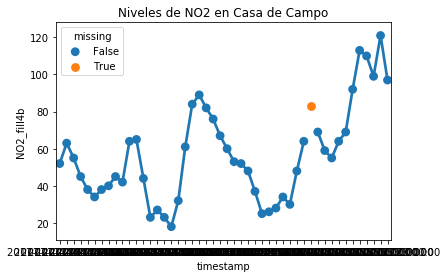

In [23]:
sns.pointplot('timestamp', 'NO2_fill4b', hue='missing', 
              data=contaminacion[(contaminacion.estacion == "Casa de Campo") &\
                                 (contaminacion.timestamp >= "2017-12-04") &\
                                 (contaminacion.timestamp < "2017-12-06")])

plt.title("Niveles de NO2 en Casa de Campo")

Text(0.5,1,'Niveles de NO2 en Escuelas Aguirre')

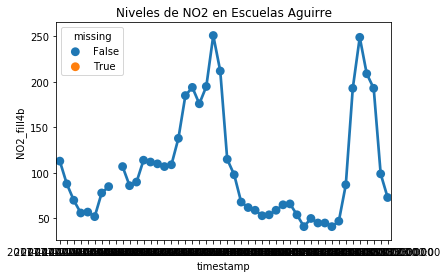

In [24]:
sns.pointplot('timestamp', 'NO2_fill4b', hue='missing', 
              data=contaminacion[(contaminacion.estacion == "Escuelas Aguirre") &\
                                 (contaminacion.timestamp >= "2017-11-17") &\
                                 (contaminacion.timestamp < "2017-11-19")])

plt.title("Niveles de NO2 en Escuelas Aguirre")

### Ejemplo 5: imputación temporal con última observación

In [25]:
contaminacion['NO2_fill5'] = contaminacion.groupby('estacion').NO2.fillna(method='pad')

In [26]:
contaminacion[contaminacion.missing].sample(5)

,estacion,zona,timestamp,NO2,O3,PM10,PM25,missing,NO2_fill1,NO2_fill2,NO2_bins,NO2_fill3,NO2_fill4a,NO2_fill4b,NO2_fill5
923,Arturo Soria,3,2017-11-08 11:00:00,NaN,NaN,NaN,NaN,True,55.007985,55.440763,NaN,22.5,NaN,NaN,20.0
17965,Juan Carlos I,3,2017-10-13 12:00:00,NaN,NaN,NaN,NaN,True,55.007985,40.696777,NaN,27.5,NaN,NaN,24.0
16901,Farolillo,5,2017-11-30 05:00:00,NaN,NaN,NaN,NaN,True,55.007985,56.990901,NaN,27.5,NaN,NaN,13.0
7858,Casa de Campo,4,2017-11-21 10:00:00,NaN,7.0,33.0,20.0,True,55.007985,39.528044,NaN,17.5,68.148112,72.0,39.0
2441,Barajas Pueblo,3,2017-10-10 16:00:00,NaN,NaN,NaN,NaN,True,55.007985,54.568120,NaN,52.5,NaN,NaN,35.0


Text(0.5,1,'Niveles de NO2 en Escuelas Aguirre')

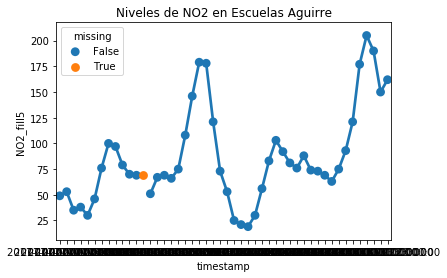

In [27]:
sns.pointplot('timestamp', 'NO2_fill5', hue='missing', 
              data=contaminacion[(contaminacion.estacion == "Escuelas Aguirre") &\
                                 (contaminacion.timestamp >= "2017-10-09") &\
                                 (contaminacion.timestamp < "2017-10-11")])

plt.title("Niveles de NO2 en Escuelas Aguirre")

Text(0.5,1,'Niveles de NO2 en Escuelas Aguirre')

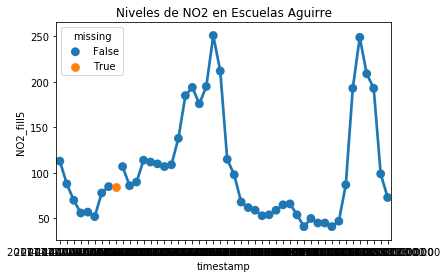

In [28]:
sns.pointplot('timestamp', 'NO2_fill5', hue='missing', 
              data=contaminacion[(contaminacion.estacion == "Escuelas Aguirre") &\
                                 (contaminacion.timestamp >= "2017-11-17") &\
                                 (contaminacion.timestamp < "2017-11-19")])

plt.title("Niveles de NO2 en Escuelas Aguirre")